In [1]:
# Load the dataset, get the desired values only.
# Make the points into categorical data
# USe smoot
# train 
# evaluate.

# 'protocol'
# 'flow_duration'
# 'tot_fwd_pkts'
# 'tot_bwd_pkts'
# 'totlen_fwd_pkts'
# 'totlen_bwd_pkts'
# 'fwd_pkt_len_mean'
# 'fwd_pkt_len_std'
# 'bwd_pkt_len_mean'
# 'flow_byts_s'
# 'flow_pkts_s'
# 'flow_iat_std'
# 'flow_iat_min'
# 'fwd_iat_tot'
# 'fwd_iat_min'
# 'bwd_iat_tot'
# 'bwd_iat_min'
# 'fwd_psh_flags'
# 'fwd_urg_flags'
# 'bwd_pkts_s'
# 'fin_flag_cnt'
# 'rst_flag_cnt'
# 'psh_flag_cnt'
# 'ack_flag_cnt'
# 'urg_flag_cnt'
# 'down_up_ratio'
# 'init_fwd_win_byts'
# 'init_bwd_win_byts'
# 'fwd_seg_size_min'
# 'active_mean'
# 'idle_mean'


# label

In [2]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('ddos-loic-udp_hoic_21-02-2018.csv')
data.head()

,dst_port,protocol,timestamp,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,...,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,80,6,21/02/2018 08:33:25,37953,5,3,135,127,135,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,500,17,21/02/2018 08:33:06,117573474,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58800000.0,23800000.0,75600000,42000000,Benign
2,500,17,21/02/2018 08:33:06,117573474,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58800000.0,23800000.0,75600000,42000000,Benign
3,500,17,21/02/2018 08:33:11,99743998,5,0,2500,0,500,500,...,8,4000290.0,0.0,4000290,4000290,31900000.0,37900000.0,75600000,7200397,Benign
4,500,17,21/02/2018 08:33:11,99743999,5,0,2500,0,500,500,...,8,4000286.0,0.0,4000286,4000286,31900000.0,37900000.0,75600000,7200399,Benign


In [4]:
data['label'].value_counts()

label
DDOS attack-HOIC        686012
Benign                  360833
DDOS attack-LOIC-UDP      1730
Name: count, dtype: int64

In [5]:
cols = [
    'protocol',
'flow_duration',
'tot_fwd_pkts',
'tot_bwd_pkts',
'totlen_fwd_pkts',
'totlen_bwd_pkts',
'fwd_pkt_len_mean',
'fwd_pkt_len_std',
'bwd_pkt_len_mean',
'flow_byts_s',
'flow_pkts_s',
'flow_iat_std',
'flow_iat_min',
'fwd_iat_tot',
'fwd_iat_min',
'bwd_iat_tot',
'bwd_iat_min',
'fwd_psh_flags',
'fwd_urg_flags',
'bwd_pkts_s',
'fin_flag_cnt',
'rst_flag_cnt',
'psh_flag_cnt',
'ack_flag_cnt',
'urg_flag_cnt',
'down_up_ratio',
'init_fwd_win_byts',
'init_bwd_win_byts',
'fwd_seg_size_min',
'active_mean',
'idle_mean',
'label'
]

In [6]:
df_new = data[cols]
df_new

,protocol,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_mean,fwd_pkt_len_std,bwd_pkt_len_mean,flow_byts_s,...,psh_flag_cnt,ack_flag_cnt,urg_flag_cnt,down_up_ratio,init_fwd_win_byts,init_bwd_win_byts,fwd_seg_size_min,active_mean,idle_mean,label
0,6,37953,5,3,135,127,27.0,60.373835,42.333333,6903.275103,...,1,0,0,0,29200,219,32,0.0,0.0,Benign
1,17,117573474,3,0,1500,0,500.0,0.000000,0.000000,12.757980,...,0,0,0,0,-1,-1,8,0.0,58800000.0,Benign
2,17,117573474,3,0,1500,0,500.0,0.000000,0.000000,12.757980,...,0,0,0,0,-1,-1,8,0.0,58800000.0,Benign
3,17,99743998,5,0,2500,0,500.0,0.000000,0.000000,25.064165,...,0,0,0,0,-1,-1,8,4000290.0,31900000.0,Benign
4,17,99743999,5,0,2500,0,500.0,0.000000,0.000000,25.064165,...,0,0,0,0,-1,-1,8,4000286.0,31900000.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,6,1252,5,2,935,274,187.0,418.144712,137.000000,965654.952100,...,1,0,0,0,65535,32768,20,0.0,0.0,Benign
1048571,6,19055,5,2,935,341,187.0,418.144712,170.500000,66964.051430,...,1,0,0,0,65535,32768,20,0.0,0.0,Benign
1048572,6,36677,5,2,935,341,187.0,418.144712,170.500000,34790.195490,...,1,0,0,0,65535,32768,20,0.0,0.0,Benign
1048573,6,1849,5,2,935,341,187.0,418.144712,170.500000,690102.758200,...,1,0,0,0,65535,32768,20,0.0,0.0,Benign


In [7]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [8]:
df_new['protocol'] = LE.fit_transform(df_new['protocol'])
df_new['label'] = LE.fit_transform(df_new['label'])

/var/folders/ld/bwffsrf52mnfq4_gy_k9p9480000gn/T/ipykernel_47694/3086081652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['protocol'] = LE.fit_transform(df_new['protocol'])
/var/folders/ld/bwffsrf52mnfq4_gy_k9p9480000gn/T/ipykernel_47694/3086081652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['label'] = LE.fit_transform(df_new['label'])


In [9]:
df_new['protocol'].value_counts()

protocol
1    1044863
2       3651
0         61
Name: count, dtype: int64

In [10]:
threshold = pd.to_numeric(np.finfo(np.float64).max)

# Remove rows with any value greater than float64
df_new = df_new[(df_new <= threshold).all(axis=1)]

print("DataFrame after removing rows with any value greater than float64:")
print(df_new)

DataFrame after removing rows with any value greater than float64:
         protocol  flow_duration  tot_fwd_pkts  tot_bwd_pkts  totlen_fwd_pkts  \
0               1          37953             5             3              135   
1               2      117573474             3             0             1500   
2               2      117573474             3             0             1500   
3               2       99743998             5             0             2500   
4               2       99743999             5             0             2500   
...           ...            ...           ...           ...              ...   
1048570         1           1252             5             2              935   
1048571         1          19055             5             2              935   
1048572         1          36677             5             2              935   
1048573         1           1849             5             2              935   
1048574         1          20580          

In [11]:
columns_with_na = df_new.columns[df_new.isna().any()].tolist()
print("Columns with NaN values:", columns_with_na)

Columns with NaN values: []


In [12]:
df_new = df_new.dropna()

In [13]:
columns_with_na = df_new.columns[df_new.isna().any()].tolist()
print("Columns with NaN values:", columns_with_na)

Columns with NaN values: []


/var/folders/ld/bwffsrf52mnfq4_gy_k9p9480000gn/T/ipykernel_47694/2687928747.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df_new['label']).plot.bar()


label
1    686012
0    360833
2      1730
Name: count, dtype: int64

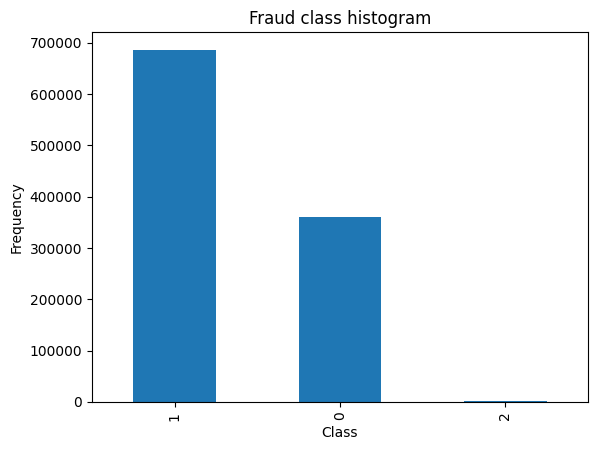

In [14]:
pd.value_counts(df_new['label']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
df_new['label'].value_counts()

In [15]:
cols_x = [
    'protocol',
'flow_duration',
'tot_fwd_pkts',
'tot_bwd_pkts',
'totlen_fwd_pkts',
'totlen_bwd_pkts',
'fwd_pkt_len_mean',
'fwd_pkt_len_std',
'bwd_pkt_len_mean',
'flow_byts_s',
'flow_pkts_s',
'flow_iat_std',
'flow_iat_min',
'fwd_iat_tot',
'fwd_iat_min',
'bwd_iat_tot',
'bwd_iat_min',
'fwd_psh_flags',
'fwd_urg_flags',
'bwd_pkts_s',
'fin_flag_cnt',
'rst_flag_cnt',
'psh_flag_cnt',
'ack_flag_cnt',
'urg_flag_cnt',
'down_up_ratio',
'init_fwd_win_byts',
'init_bwd_win_byts',
'fwd_seg_size_min',
'active_mean',
'idle_mean'
]

In [16]:
X = np.array(df_new[cols_x])
y = np.array(df_new['label'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (1048575, 31)
Shape of y: (1048575,)


In [17]:
df_new

,protocol,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_mean,fwd_pkt_len_std,bwd_pkt_len_mean,flow_byts_s,...,psh_flag_cnt,ack_flag_cnt,urg_flag_cnt,down_up_ratio,init_fwd_win_byts,init_bwd_win_byts,fwd_seg_size_min,active_mean,idle_mean,label
0,1,37953,5,3,135,127,27.0,60.373835,42.333333,6903.275103,...,1,0,0,0,29200,219,32,0.0,0.0,0
1,2,117573474,3,0,1500,0,500.0,0.000000,0.000000,12.757980,...,0,0,0,0,-1,-1,8,0.0,58800000.0,0
2,2,117573474,3,0,1500,0,500.0,0.000000,0.000000,12.757980,...,0,0,0,0,-1,-1,8,0.0,58800000.0,0
3,2,99743998,5,0,2500,0,500.0,0.000000,0.000000,25.064165,...,0,0,0,0,-1,-1,8,4000290.0,31900000.0,0
4,2,99743999,5,0,2500,0,500.0,0.000000,0.000000,25.064165,...,0,0,0,0,-1,-1,8,4000286.0,31900000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1,1252,5,2,935,274,187.0,418.144712,137.000000,965654.952100,...,1,0,0,0,65535,32768,20,0.0,0.0,0
1048571,1,19055,5,2,935,341,187.0,418.144712,170.500000,66964.051430,...,1,0,0,0,65535,32768,20,0.0,0.0,0
1048572,1,36677,5,2,935,341,187.0,418.144712,170.500000,34790.195490,...,1,0,0,0,65535,32768,20,0.0,0.0,0
1048573,1,1849,5,2,935,341,187.0,418.144712,170.500000,690102.758200,...,1,0,0,0,65535,32768,20,0.0,0.0,0


In [18]:
df_new['label'].value_counts()

label
1    686012
0    360833
2      1730
Name: count, dtype: int64

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_t, X_v, y_t, y_v = train_test_split(X_train, y_train, test_size=0.2)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (838860, 31)
Number transactions y_train dataset:  (838860,)
Number transactions X_test dataset:  (209715, 31)
Number transactions y_test dataset:  (209715,)


In [21]:
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '2': {}".format(sum(y_train==2)))


sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_t, y_t.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res==2)))


Before OverSampling, counts of label '0': 288936
Before OverSampling, counts of label '1': 548556
Before OverSampling, counts of label '2': 1368
Before OverSampling, counts of label '3': 0
After OverSampling, the shape of train_X: (1316334, 31)
After OverSampling, the shape of train_y: (1316334,) 

After OverSampling, counts of label '0': 438778
After OverSampling, counts of label '1': 438778
After OverSampling, counts of label '2': 438778
After OverSampling, counts of label '3': 0


In [22]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [23]:
xgb_model = xgb.XGBClassifier()

In [24]:
parameters = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [50, 100]
}

In [25]:
clf = GridSearchCV(xgb_model, parameters, cv=2, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 2/2] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=1.000 total time=  10.2s
[CV 1/2] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=1.000 total time=  10.3s
[CV 1/2] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=1.000 total time=  17.9s
[CV 1/2] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=1.000 total time=  10.2s
[CV 2/2] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=1.000 total time=  17.9s
[CV 2/2] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=1.000 total time=  10.2s
[CV 1/2] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=1.000 total time=  12.1s
[CV 1/2] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=1.000 total time=  21.4s
[CV 2/2] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=1.000 total time=  20.9s
[CV 2/2] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=1.000 total t

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=3,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             verbose=5)

In [26]:
clf.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}

In [27]:
y_pred = clf.predict(X_v)


In [28]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_v)
acc

1.0

In [29]:
y_test_pred = clf.predict(X_test)
acc = accuracy_score(y_test_pred, y_test)
acc

1.0

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(y_test, y_test_pred)


array([[ 71897,      0,      0],
       [     0, 137456,      0],
       [     0,      0,    362]])

In [32]:
y_t.size


671088

In [33]:
y_v.size

167772

In [34]:
y_test.size

209715

In [35]:
clf

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=3,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             verbose=5)

In [36]:
from joblib import dump, load


In [37]:
dump(clf, "ddos-loic-udp_hoic_21-02-2018.csv.joblib")

['ddos-loic-udp_hoic_21-02-2018.csv.joblib']

In [44]:
loaded_clf = load("ddos-loic-udp_hoic_21-02-2018.csv.joblib")

In [45]:
loaded_clf.predict(X_test)

array([1, 1, 0, ..., 1, 1, 1])

In [46]:
current_row = X_test[0]

In [47]:
current_row = current_row.reshape(1, -1)

In [48]:
prediction = loaded_clf.predict(current_row)
print(prediction)

[1]


In [49]:
mis = 0
for i in range(len(X_test)):

    current_row = X_test[i]
    current_row = current_row.reshape(1, -1)
    prediction = loaded_clf.predict(current_row)
    actual = y_test[i]
    if prediction[0] != actual :
        mis+=1
        print(i, prediction, actual)
print(mis)
    

0


In [50]:
print(mis)

0


In [51]:
label_encodings = LE.classes_
print("Label Encodings:")
for label, encoding in zip(label_encodings, range(len(label_encodings))):
    print(f"{label}: {encoding}")

# Print the predicted labels

Label Encodings:
Benign: 0
DDOS attack-HOIC: 1
DDOS attack-LOIC-UDP: 2
